In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

In [2]:
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Version:", torch.version.cuda)
print("Number of GPUs:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("Device Index:", torch.cuda.current_device())

CUDA Available: True
CUDA Version: 11.7
Number of GPUs: 1
GPU Name: NVIDIA GeForce RTX 2060 SUPER
Device Index: 0


In [3]:
file_path = os.path.join(os.getcwd(), "data")  # Path of the file

In [4]:
def imshow(img):
    img = img / 2 + 0.5  # Undo normalization (reverse x' = (x - mean) / std)
    npimg = img.numpy()   # Convert to NumPy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Convert (C, H, W) -> (H, W, C)
    plt.show()

In [5]:
# Create pipeline that will transform images pixels values to tensor (divide by 255)
# Then for each color red, green and blue it will take (x - mean / std).
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 4  # divide total number of samples that go in model

In [6]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


In [7]:
# Access the first image and label
image, label = trainset[100]  # image is a tensor

# Print the tensor values (optional, just to see raw numbers)
print(image.shape)  # Output: torch.Size([3, 32, 32]) -> (Channels, Height, Width)
print(image)        # Shows the pixel values as a tensor

torch.Size([3, 32, 32])
tensor([[[0.6706, 0.6549, 0.6549,  ..., 0.1843, 0.1843, 0.1686],
         [0.6784, 0.6627, 0.6627,  ..., 0.1922, 0.1922, 0.1843],
         [0.6941, 0.6784, 0.6706,  ..., 0.2000, 0.2000, 0.1843],
         ...,
         [0.1373, 0.0667, 0.1216,  ..., 0.6941, 0.5373, 0.4353],
         [0.0902, 0.0118, 0.0118,  ..., 0.7804, 0.7490, 0.6392],
         [0.0745, 0.1216, 0.0667,  ..., 0.6392, 0.7020, 0.7882]],

        [[0.7961, 0.7804, 0.7804,  ..., 0.3647, 0.3647, 0.3490],
         [0.7961, 0.7804, 0.7804,  ..., 0.3725, 0.3725, 0.3647],
         [0.7961, 0.7804, 0.7804,  ..., 0.3804, 0.3804, 0.3647],
         ...,
         [0.2471, 0.1608, 0.1922,  ..., 0.7020, 0.5451, 0.4353],
         [0.2000, 0.1137, 0.0902,  ..., 0.7882, 0.7569, 0.6392],
         [0.1922, 0.2157, 0.1373,  ..., 0.6392, 0.7020, 0.7882]],

        [[0.8980, 0.8824, 0.8824,  ..., 0.6157, 0.6157, 0.6000],
         [0.8902, 0.8745, 0.8745,  ..., 0.6235, 0.6235, 0.6078],
         [0.8745, 0.8588, 0.8588, 

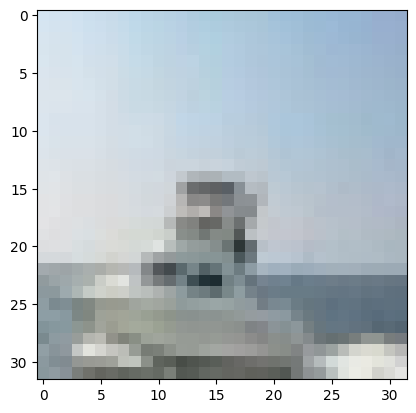

In [8]:
# Display the first image
imshow(image)

In [9]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


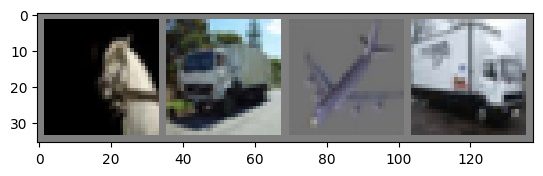

horse truck plane truck


In [14]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))